In [43]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

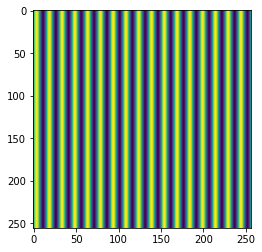

In [44]:
#Generate a 2D sine wave image
T=15
x = np.arange(256)  # generate values from 0 to 255 (our image size)
y = np.sin(2 * np.pi * x / T)  #calculate sine of x values
#Divide by a smaller number above to increase the frequency.
y += max(y) # offset sine wave by the max value to go out of negative range of sine 

#Generate a 256x256 image (2D array of the sine wave)
img = np.array([[y[j]*127 for j in range(256)] for i in range(256)], dtype=np.uint8) # create 2-D array of sine-wave

#img = cv2.imread('images/sandstone.tif', 0) # load an actual image
plt.imshow(img)

In [49]:


img = cv2.imread('/content/drive/MyDrive/images/L10/sandstone.tif', 0) # load an image
#plt.imshow(img)

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT) # typecasting

In [50]:
#Shift DFT. First check the output without the shift
#Without shifting the data would be centered around origin at the top left
#Shifting it moves the origin to the center of the image. 
dft_shift = np.fft.fftshift(dft)

#dft_shift = dft
#try without shift

In [51]:
#Calculate magnitude spectrum from the DFT (Real part and imaginary part)
#Added 1 as we may see 0 values and log of 0 is indeterminate
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)

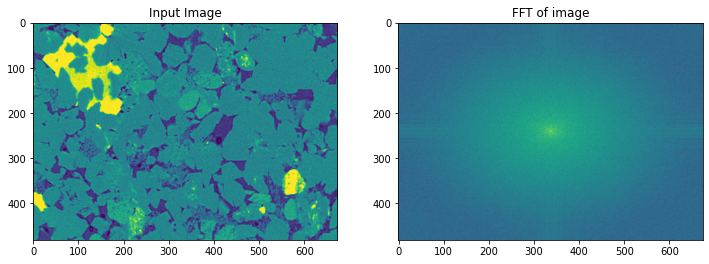

In [52]:
#As the spatial frequency increases (bars closer), 
#the peaks in the DFT amplitude spectrum move farther away from the origin

#Center represents low frequency and the corners high frequency (with DFT shift).

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum)
ax2.title.set_text('FFT of image')
plt.show()

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
